In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as spysig
import pyhht

In [71]:
df_fold = pd.read_csv('/home/jmenard/HHT_EWS/traj_data.csv')
df_hopf = pd.read_csv('/home/jmenard/HHT_EWS/traj_data_hopf.csv')

In [3]:
df_fold.shape

(50000, 3)

In [4]:
df_fold.head()

,Realisation number,Time,x
0,1.0,0.00,1.039525
1,1.0,0.01,1.030637
2,1.0,0.02,1.024715
3,1.0,0.03,1.021310
4,1.0,0.04,1.017326


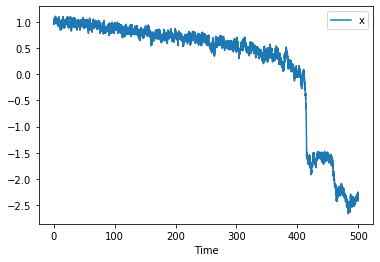

In [5]:
df_fold.plot('Time', 'x')

In [9]:
df_fold['x'].shape

(50000,)

In [11]:
from pyhht.visualization import plot_imfs
decomposer = pyhht.EMD(df_fold['x'].values, df_fold['Time'].values)
imfs = decomposer.decompose()
t = df_fold['Time'].values

Mode 12, Iteration 600
0 minima > 0; 9 maxima < 0.


NameError: name 'x' is not defined

2
3
4
5
6
7
8
9
10
11
12
13
14


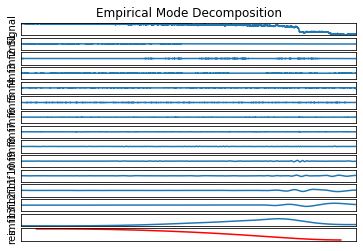

In [12]:
plot_imfs(df_fold['x'].values, imfs, t)

In [15]:
imfs.shape

(14, 50000)

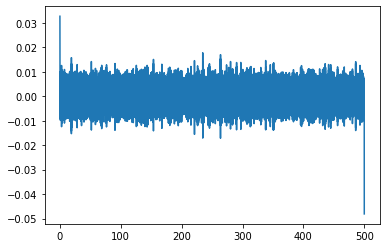

In [18]:
plt.plot(t, imfs[0])

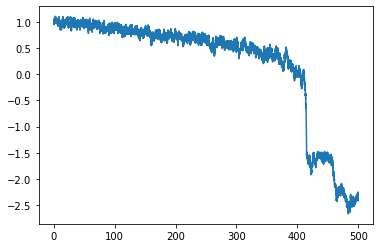

In [19]:
plt.plot(t, df_fold['x'].values)

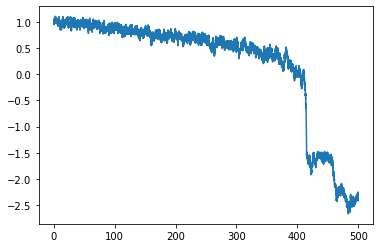

In [21]:
plt.plot(t, np.sum(imfs, axis=0))

In [52]:
z_a1 = spysig.hilbert(imfs)

In [53]:
z_a1

array([[ 0.03265767-5.67039512e-02j,  0.02448882-7.85380483e-03j,
         0.01962043-8.93291693e-03j, ..., -0.03592334-8.50360058e-05j,
        -0.04069556+5.45653303e-04j, -0.04807511-5.89638476e-02j],
       [ 0.05500901-7.62258833e-02j,  0.0529995 -2.33216508e-02j,
         0.05049223-2.11399665e-02j, ..., -0.02140114-2.80994322e-02j,
        -0.02297307-2.76728894e-02j, -0.02398711-7.81825767e-02j],
       [-0.02498273+1.35779522e-01j, -0.02374968+5.59501932e-02j,
        -0.0222771 +5.80915890e-02j, ...,  0.09964211+4.05977185e-02j,
         0.10204106+4.57776707e-02j,  0.10337982+1.32547680e-01j],
       ...,
       [-0.0159716 +7.74359078e-01j, -0.01597107+6.44775276e-01j,
        -0.01597054+6.44622850e-01j, ...,  0.18742932+6.45446824e-01j,
         0.18738347+6.45293104e-01j,  0.18733779+7.74541455e-01j],
       [-1.86612196+1.74917746e+00j, -1.86613223+1.50588246e+00j,
        -1.8661425 +1.50587205e+00j, ..., -1.48401666+1.50587637e+00j,
        -1.48398896+1.50586569e+00j

In [32]:
phi_a1 = np.arctan(np.imag(z_a1)/np.real(z_a1))

In [39]:
phi_a1

array([-1.04826127, -0.31034675, -0.42724145, ...,  0.00236715,
       -0.01340738,  0.88677631])

(1000, 2000)

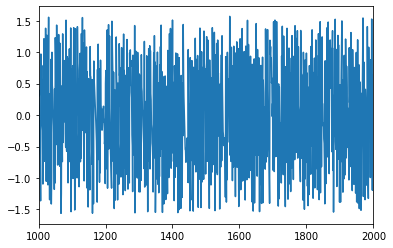

In [41]:
plt.plot(phi_a1)

In [55]:
z_a1.shape

(14, 50000)

In [68]:
tst_instfreq_1 = pyhht.utils.inst_freq(z_a1[2])

(350, 420)

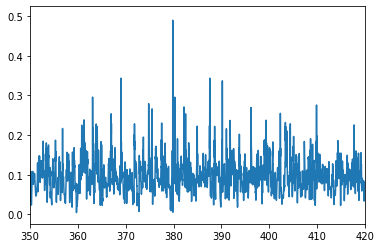

In [69]:
plt.plot(t[1:t.shape[0]-1], tst_instfreq_1[0])
plt.xlim(350,420)

In [72]:
df_hopf.shape

(100000, 4)

In [73]:
df_hopf.head()

,Realisation number,Time,x,y
0,1.0,0.00,-0.005291,0.056782
1,1.0,0.01,-0.017308,0.056455
2,1.0,0.02,-0.022143,0.054117
3,1.0,0.03,-0.023465,0.057369
4,1.0,0.04,-0.026436,0.053511


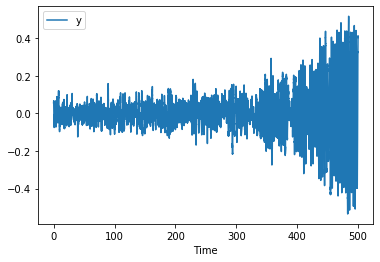

In [75]:
df_hopf[df_hopf["Realisation number"]==1.0].plot('Time', 'y')

In [77]:
z_a1.shape

(14, 50000)

In [78]:
z_a11 = z_a1[0,:]
z_a11.shape

(50000,)

In [79]:
amp_a11 = np.sqrt(np.power(np.real(z_a11),2)+np.power(np.imag(z_a11),2))

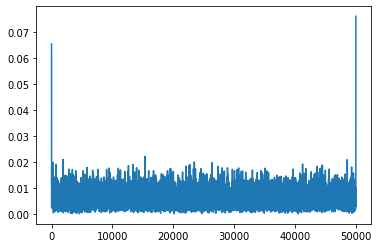

In [80]:
plt.plot(amp_a11)

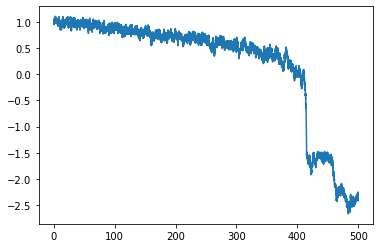

In [86]:
plt.plot(t, df_fold['x'].values)

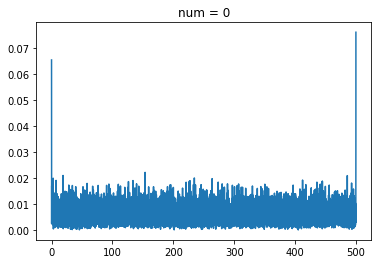

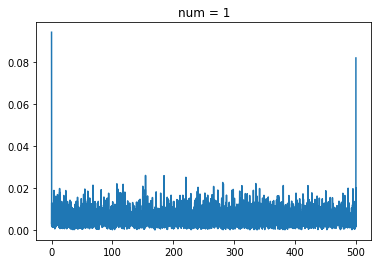

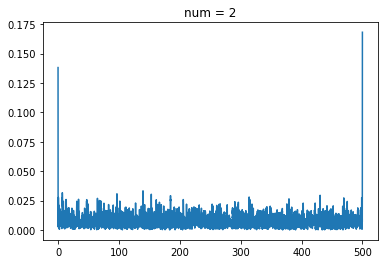

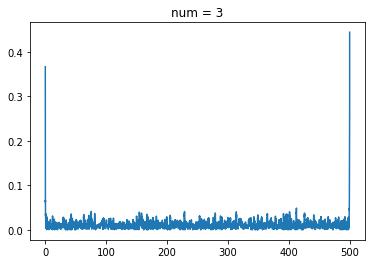

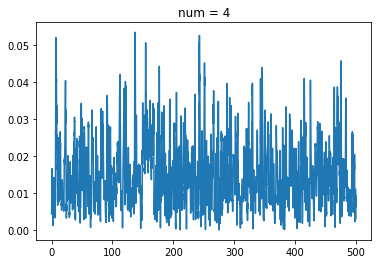

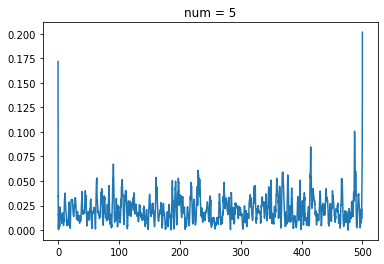

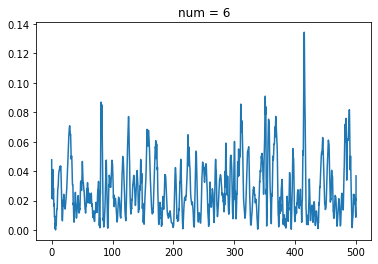

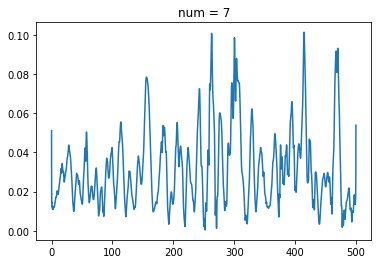

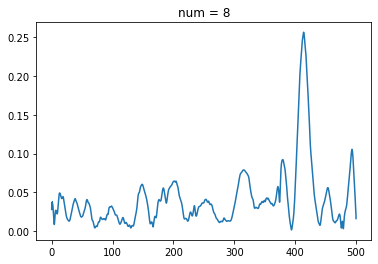

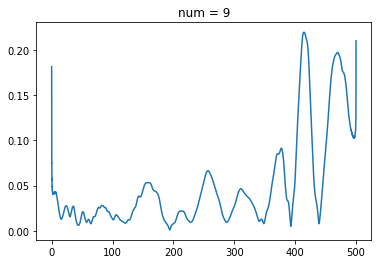

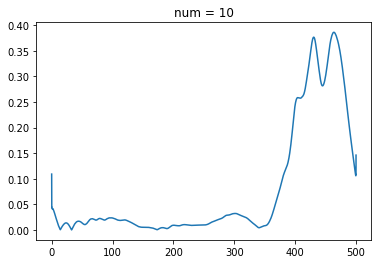

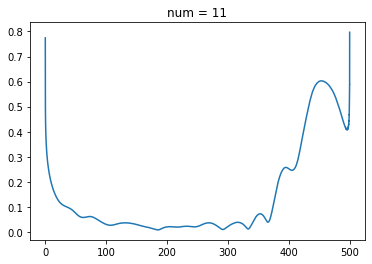

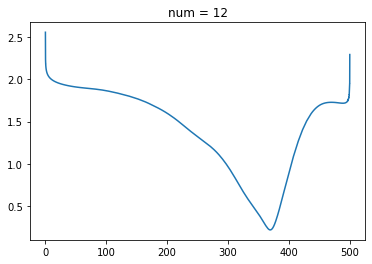

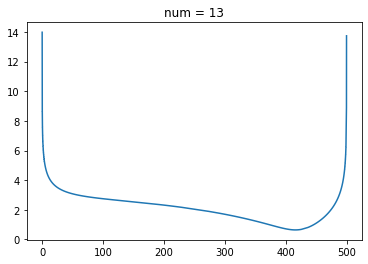

In [87]:
for i in range(0,14):
    z_a11 = z_a1[i,:]
    z_a11.shape
    amp_a11 = np.sqrt(np.power(np.real(z_a11),2)+np.power(np.imag(z_a11),2))
    plt.plot(t,amp_a11)
    plt.title('num = '+str(i))
    plt.show()

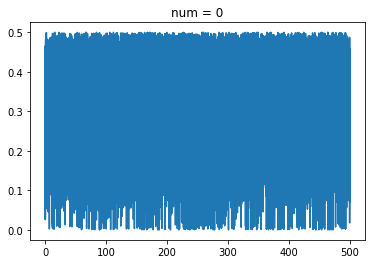

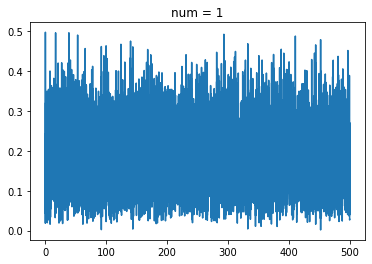

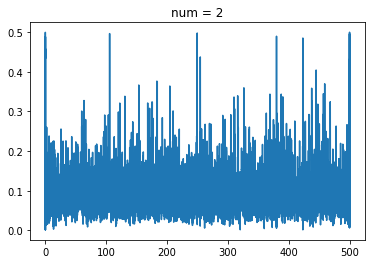

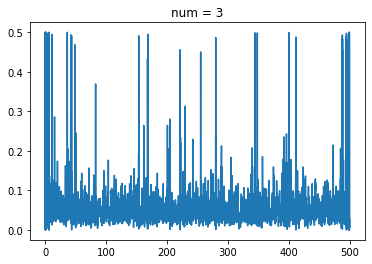

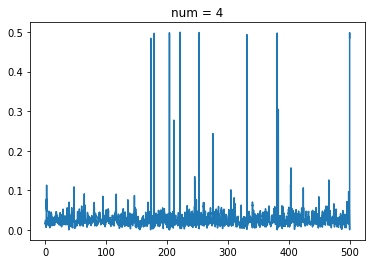

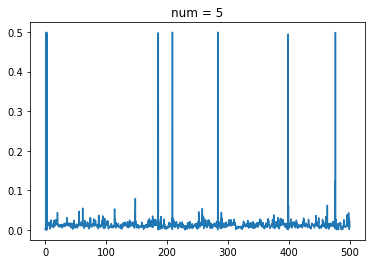

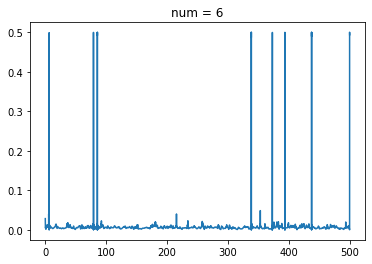

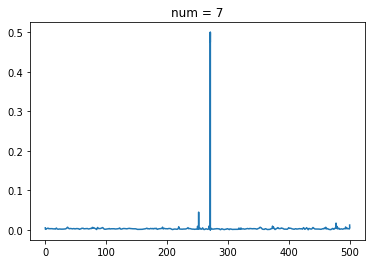

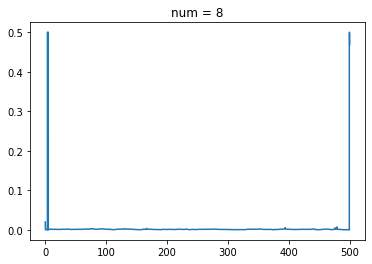

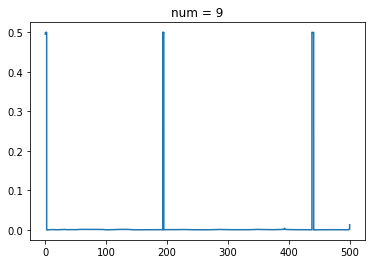

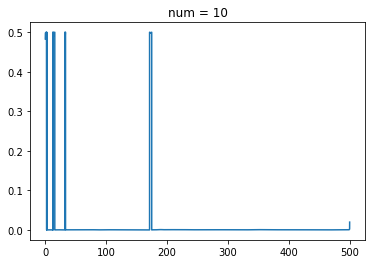

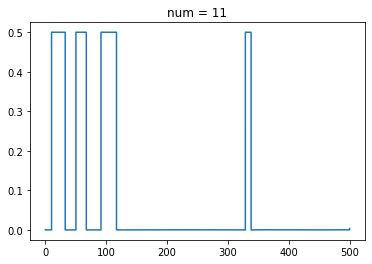

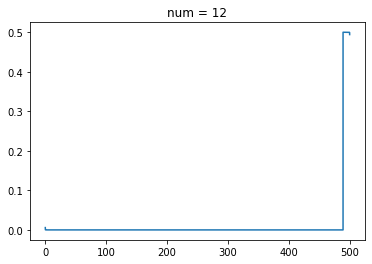

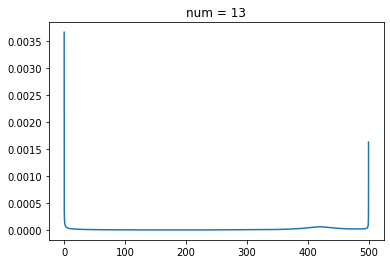

In [88]:
for i in range(0,14):
    z_a11 = z_a1[i,:]
    tst_instfreq_1 = pyhht.utils.inst_freq(z_a11)
    plt.plot(t[1:t.shape[0]-1], tst_instfreq_1[0])
    plt.title('num = '+str(i))
    plt.show()

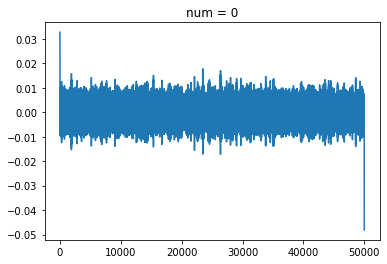

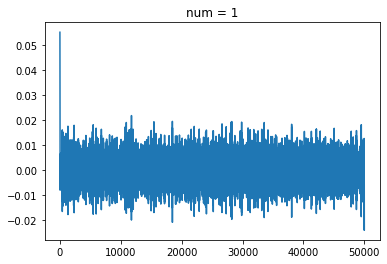

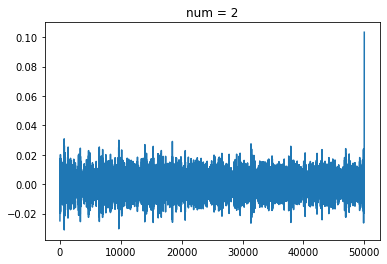

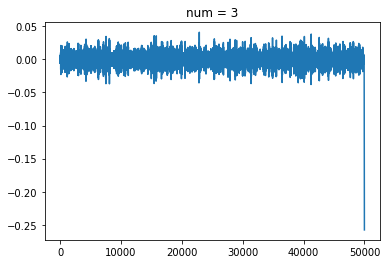

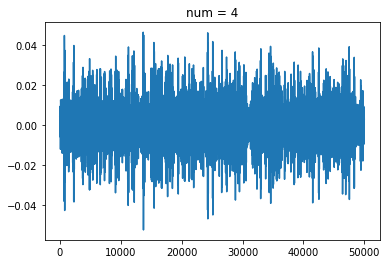

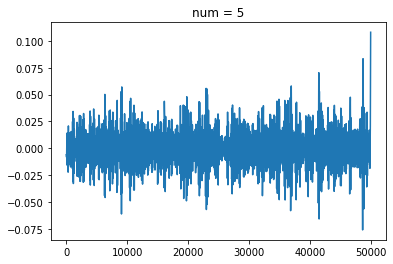

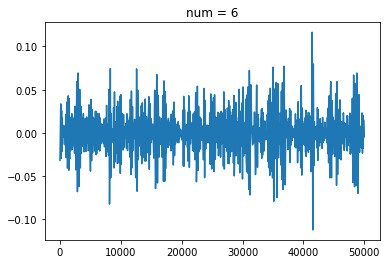

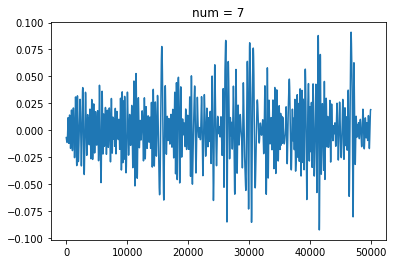

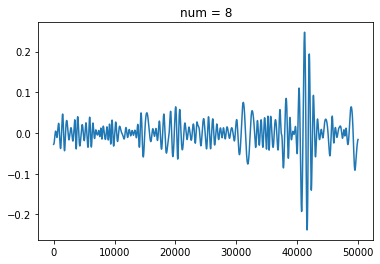

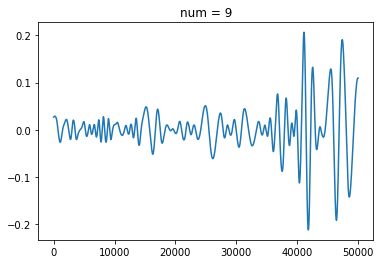

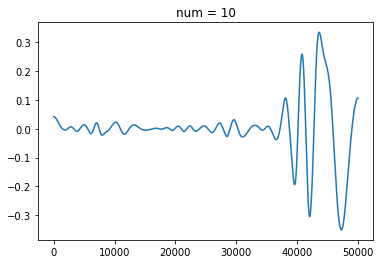

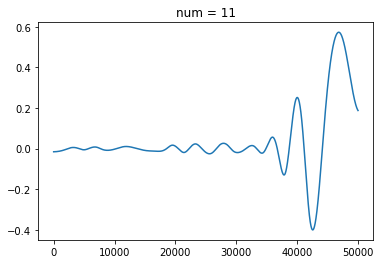

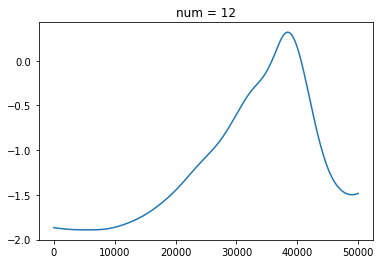

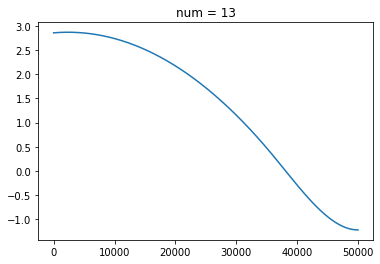

In [85]:
for i in range(0,14):
    imf_ = imfs[i,:]
    plt.plot(imf_)
    plt.title('num = '+str(i))
    plt.show()